# Исследование функций

In [1]:
from sympy import Symbol, S
from sympy.calculus.util import continuous_domain # Область определения функции
from sympy.calculus.util import function_range # Область значения функции
from sympy import solveset, Eq # для нахождения точек пересечения с осями
from sympy import diff # Поиск производной
from sympy import limit, oo # для нахождения асимптот

In [2]:
x = Symbol("x")
f = (x**3)/(x**2 - 1)

In [3]:
# Область определения
continuous_domain(f, x, S.Reals)

Union(Interval.open(-oo, -1), Interval.open(-1, 1), Interval.open(1, oo))

In [4]:
# Область значений
function_range(f, x, S.Reals)

Interval(-oo, oo)

In [5]:
# Точки пересечения с осью х
solveset(Eq(f, 0), x)

{0}

In [6]:
# Точки пересечения с осью у
f.subs(x, 0)

0

In [7]:
# Нахождение производной
y1 = f.diff(x)
y1

-2*x**4/(x**2 - 1)**2 + 3*x**2/(x**2 - 1)

In [8]:
# Нахождение точек пересечения с осью х 
solveset(Eq(y1, 0), x)

{0, -sqrt(3), sqrt(3)}

In [9]:
# Нахождение второй производной
y2 = f.diff(x, 2)
y2

2*x*(x**2*(4*x**2/(x**2 - 1) - 1)/(x**2 - 1) - 6*x**2/(x**2 - 1) + 3)/(x**2 - 1)

In [10]:
# Нахождение точек пересечения с осью х 
solveset(Eq(y2, 0), x)

{0, -sqrt(3)*I, sqrt(3)*I}

In [11]:
# Нахождение горизонтальной асимптоты
limit(f, x, oo)

oo

In [12]:
# Нахождение вертикальной асимптоты в точках, где функция не существует
limit(f, x, 1)

oo

In [13]:
# Нахождение наклонных асимптот (коэффициент к)
f = (x**3)/((x**2-1)*x) # делим функцию на x
limit(f, x, oo)

1

In [14]:
# Нахождение наклонных асимптот (коэффициент b)
f = (x**3)/((x**2-1)) - 1*x # вычитаем из функции коэффициент к, умноженный на х
limit(f, x, oo)

0

Итого:
- горизонтальная асимптота отсутствует
- вертикальные асимптоты в точках -1 и 1
- наклонная асимптота задается уравнением y = x

# Оптимизация функций

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1])**2 + (1-x[:-1])**2, axis=0)
    return r

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_12464\2502562003.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = graph.gca(projection='3d')


<function matplotlib.pyplot.show(close=None, block=None)>

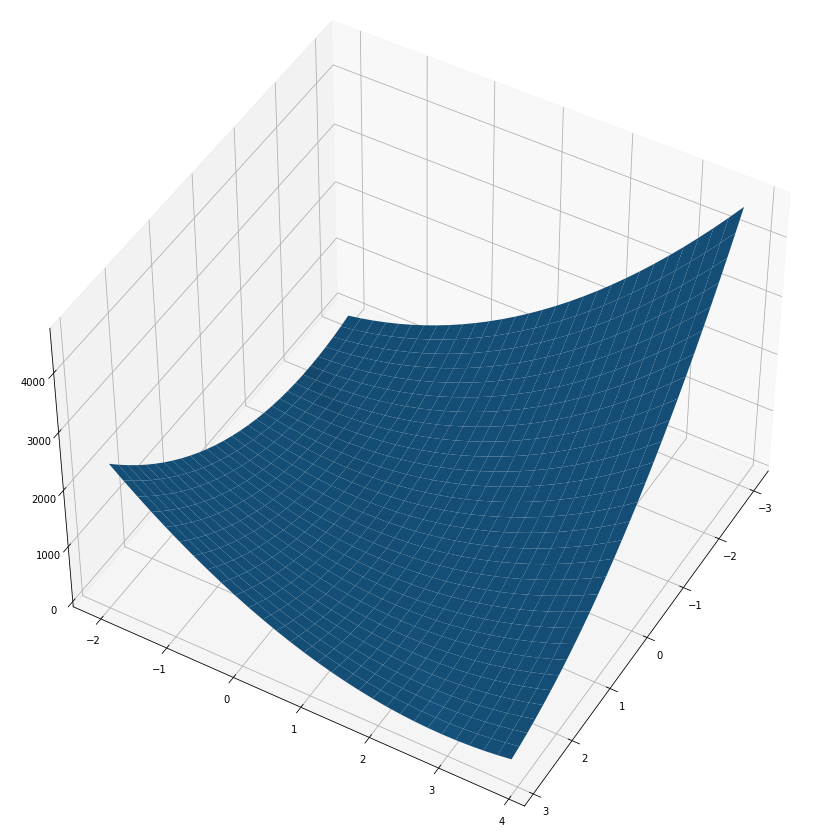

In [31]:
graph = plt.figure(figsize=[25, 15])
ax = graph.gca(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1, x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show

In [33]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell') # Оптимизация методом Пауэлла
print(result_point.x)

[1. 1. 1. 1. 1.]


In [34]:
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead') # Оптимизация методом Нелдера-Мида
print(result_point.x)

[1.00000153 1.00001188 1.00001519 1.00000961 1.00001026]


In [36]:
from scipy.optimize import least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = least_squares(func_rosen, x1) # Оптимизация методом наименьших квадратов
print(result_point.x)

[1.0625319  1.06289683 1.06276514 1.06353146 1.06380317]


# Алгоритм градиентного спуска

In [37]:
# Оптимизируемая функция
def f(x, y):
    return (1-x)**2 + 100*(y - x**2)**2
def grad(x, y):
    dx = 2*x - 2 + 100*(-4*y*x + 4*x**3)
    dy = 100*(2*y - 2*x**2)
    return (dx, dy)

In [40]:
x0 = (0, 0)
gamma = 0.001
x_cur = x0

vals = []
coords = []
i = 0

while True:
    x_new = (x_cur[0] - gamma*grad(*x_cur)[0],
             x_cur[1] - gamma*grad(*x_cur)[1])
    if i > 10000:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f'iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f});'
          f'f(x)={f(*x_cur):.2f}; grad f(x)=({grad(*x_cur)[0]:.2f}, {grad(*x_cur)[1]:.2f})')

iter=1; x=(0.00, 0.00);f(x)=1.00; grad f(x)=(-2.00, -0.00)
iter=2; x=(0.00, 0.00);f(x)=0.99; grad f(x)=(-1.99, -0.00)
iter=3; x=(0.01, 0.00);f(x)=0.99; grad f(x)=(-1.99, -0.01)
iter=4; x=(0.01, 0.00);f(x)=0.98; grad f(x)=(-1.98, -0.01)
iter=5; x=(0.01, 0.00);f(x)=0.98; grad f(x)=(-1.98, -0.02)
iter=6; x=(0.01, 0.00);f(x)=0.98; grad f(x)=(-1.98, -0.02)
iter=7; x=(0.01, 0.00);f(x)=0.97; grad f(x)=(-1.97, -0.03)
iter=8; x=(0.02, 0.00);f(x)=0.97; grad f(x)=(-1.97, -0.03)
iter=9; x=(0.02, 0.00);f(x)=0.96; grad f(x)=(-1.96, -0.04)
iter=10; x=(0.02, 0.00);f(x)=0.96; grad f(x)=(-1.96, -0.05)
iter=11; x=(0.02, 0.00);f(x)=0.96; grad f(x)=(-1.95, -0.05)
iter=12; x=(0.02, 0.00);f(x)=0.95; grad f(x)=(-1.95, -0.06)
iter=13; x=(0.03, 0.00);f(x)=0.95; grad f(x)=(-1.95, -0.07)
iter=14; x=(0.03, 0.00);f(x)=0.95; grad f(x)=(-1.94, -0.08)
iter=15; x=(0.03, 0.00);f(x)=0.94; grad f(x)=(-1.94, -0.08)
iter=16; x=(0.03, 0.00);f(x)=0.94; grad f(x)=(-1.93, -0.09)
iter=17; x=(0.03, 0.00);f(x)=0.93; grad f(x)=(-1.

In [ ]:
# Градиентный спуск для реальных данных (матричная форма)
X = df[['TV','radio','newspaper']]
y = df['sales']
n = len(y)
X = np.append(np.ones((n,1)), X.values.reshape(n,3), axis = 1) # Приводим в необходимый вид матрицу
y = df['sales'].values.reshape(n,1) # Приводим в необходимый вид вектор
par = np.ones((4,1)) # искомые параметры (интерцепт + 3 параметра)

def cost_function(X, y , par):
    """Функция для вычисления значения функции потерь

    Args:
        X (matrix): Матрица предикторов
        y (array): Вектор истинных значений
        par (array): Вектор коэффициентов линейной регресии

    Returns:
        float: Среднее арифметическое значений функции потерь
    """
    y_pred = np.dot(X, par)
    error = (y_pred - y)**2
    cost = 1/(n)*np.sum(error)
    return cost


def grad_d(X,y, par, alpha, iterations):
    """Функция, реализующая градиентный спуск

    Args:
        X (matrix): Матрица предикторов
        y (array): Вектор истинных значений
        par (array): Вектор коэффициентов линейной регресии
        alpha (float): Темп обучения
        iterations (int): Количество итераций

    Returns:
        tuple: Кортеж значений итоговых коэффициентов линейной регресии и средней арифметической ошибки значений функции потерь
    """
    costs = []
    for i in range(iterations):
        y_pred = np.dot(X, par) # Делаем предсказание на текущих коэффициентах
        der = np.dot(X.transpose(), (y_pred - y))/n 
        par -= alpha * der # Изменяем коэффициенты
        costs.append(cost_function(X, y, par))
    return par, costs


par, costs = grad_d(X, y, par, 0.00005, 500000)
par